In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<h3 style = "text-align:center" >Exploratory Data Analysis</h3>

In [3]:
df.shape

(918, 12)

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


Checking unique values in columns

In [6]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [7]:
df.FastingBS.value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [8]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [9]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

<b>We have both categorical and numerical data. Now we will separate them to explore our data better</b>

In [10]:
categorical = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

<b>Visualisation of categorical variables</b>

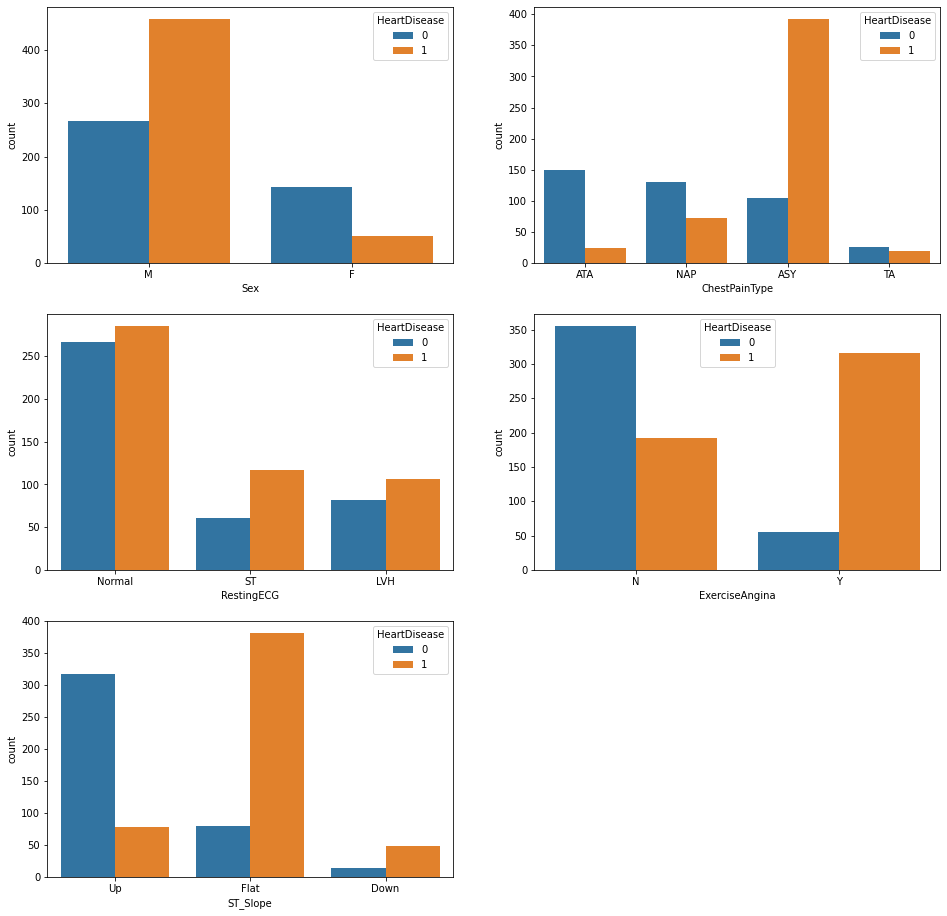

In [11]:
i = 1
plt.figure(figsize=(16,16)) 
for variable in categorical[::]:
    plt.subplot(3, 2, i)
    sns.countplot(x=df[variable], hue=df.HeartDisease)
    i += 1
    
plt.show()

Data suggest that males tend to have more heart disease problems compared to females. If chest pain type is asymptomatic, heart disease is more frequent. Exercise induced angina creates more heart diseases. Flat ST_Slope has more heart disease while Up ST_Slope has less heart disease.

<b>Visualisation of numerical variables</b>

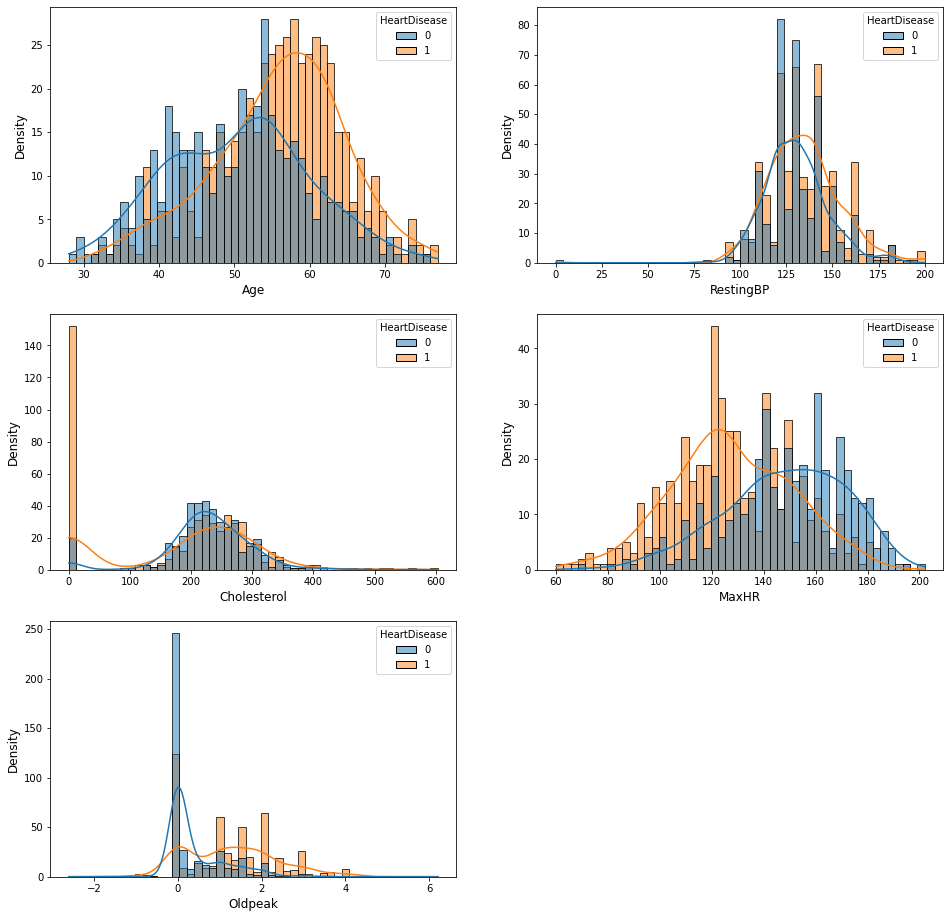

In [12]:
i = 1
plt.figure(figsize=(16,16)) 
for variable in numerical:
    plt.subplot(3, 2, i)
    sns.histplot(x=df[variable],kde=True,bins=50, hue=df.HeartDisease)
    plt.xlabel(variable,size=12)
    plt.ylabel("Density",size=12)
    i += 1
    
plt.show()

Older people have more heart diseases. Maximum heart rate lower than 140 means more risk for heart diseases. Higher oldpeak is more likely to have heart diseases.

<b>Using heatmap to find possible correlations</b>

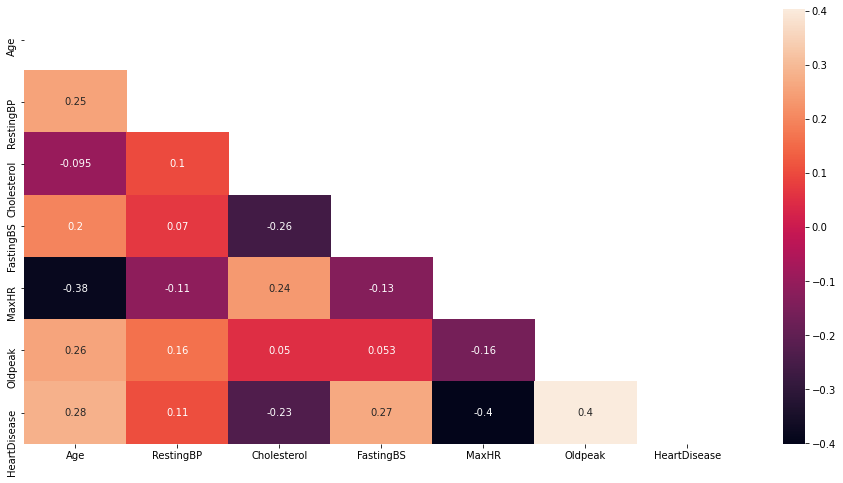

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), mask=np.triu(df.corr()), annot=True)
plt.show()

Heatmap suggests that heart disease has a positive correlation with Oldpeak while it has a negative correlation with MaxHR.

<h3 style = "text-align:center" >Data Preprocessing</h3>

<b>Replacing strings with numeric values</b>

In [14]:
df['Sex'].replace(
    {
        'M':1,
        'F':0
    }, inplace =True
)

df.ChestPainType.replace(
    {
        'ATA':0,
        'NAP':1,
        'ASY':2,
        'TA':3
    },inplace = True
)

df.RestingECG.replace(
    {
        'Normal':0,
        'ST':1,
        'LVH':2
    },inplace=True
)

df.ST_Slope.replace(
    {
        'Up':0,
        'Flat':1,
        'Down':2
    },inplace=True
)

In [15]:
df.ExerciseAngina.replace(
    {
        'N':0,
        'Y':1
    },inplace=True
)

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


<b>Outlier detection and removal for RestingBP, Cholesterol and MaxHR columns using 3 standard deviation</b>

In [17]:
RestingBP_Upper_Limit = df.RestingBP.mean() + 3*df.RestingBP.std()
RestingBP_Lower_Limit = df.RestingBP.mean() - 3*df.RestingBP.std()
RestingBP_Lower_Limit,RestingBP_Upper_Limit

(76.85405180149661, 187.93897652094347)

In [18]:
Cholesterol_Upper_Limit = df.Cholesterol.mean() + 3*df.Cholesterol.std()
Cholesterol_Lower_Limit = df.Cholesterol.mean() - 3*df.Cholesterol.std()
Cholesterol_Lower_Limit,Cholesterol_Upper_Limit

(-129.35286938645763, 526.9519979267626)

In [19]:
MaxHR_Upper_Limit = df.MaxHR.mean() + 3*df.MaxHR.std()
MaxHR_Lower_Limit = df.MaxHR.mean() - 3*df.MaxHR.std()
MaxHR_Lower_Limit,MaxHR_Upper_Limit

(60.42836577697024, 213.19037060647202)

In [20]:
df.shape

(918, 12)

In [21]:
df=df[(df.RestingBP > RestingBP_Lower_Limit)& (df.RestingBP<RestingBP_Upper_Limit)]
df.shape

(910, 12)

In [22]:
df=df[(df.Cholesterol>Cholesterol_Lower_Limit)&(df.Cholesterol<Cholesterol_Upper_Limit)]
df.shape

(907, 12)

In [23]:
df=df[(df.MaxHR>MaxHR_Lower_Limit)&(df.MaxHR<MaxHR_Upper_Limit)]
df.shape

(906, 12)

In [24]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


<b>Creating inputs and output </b>

In [25]:
X = df.drop('HeartDisease',axis='columns')
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,0,140,289,0,0,172,0,0.0,0
1,49,0,1,160,180,0,0,156,0,1.0,1
2,37,1,0,130,283,0,1,98,0,0.0,0
3,48,0,2,138,214,0,0,108,1,1.5,1
4,54,1,1,150,195,0,0,122,0,0.0,0


In [26]:
y=df['HeartDisease']
y.head()


0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

<b>Scaling our data using Standard Scaler</b>

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.43268734,  0.51513409, -1.70383434, ..., -0.8232726 ,
        -0.83125986, -1.04605981],
       [-0.47787471, -1.94124214, -0.53082985, ..., -0.8232726 ,
         0.10838011,  0.60503808],
       [-1.75095822,  0.51513409, -1.70383434, ..., -0.8232726 ,
        -0.83125986, -1.04605981],
       ...,
       [ 0.37084763,  0.51513409,  0.64217465, ...,  1.2146645 ,
         0.2963081 ,  0.60503808],
       [ 0.37084763, -1.94124214, -1.70383434, ..., -0.8232726 ,
        -0.83125986,  0.60503808],
       [-1.64486793,  0.51513409, -0.53082985, ..., -0.8232726 ,
        -0.83125986, -1.04605981]])

<b>Creating Train and Test Data</b>

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)

In [29]:
X.shape

(906, 11)

In [30]:
X_scaled.shape

(906, 11)

In [31]:
X_train.shape

(724, 11)

<b>Trying out different models using K-Fold Cross Validation without parameter tuning</b>

In [32]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [33]:
avg_lr_score = np.average(cross_val_score(LogisticRegression(), X_scaled,y,cv=5))
avg_lr_score

0.7913666444053185

In [34]:
avg_svm_score = np.average(cross_val_score(SVC(), X_scaled,y,cv=5))
avg_svm_score

0.8178434824843664

In [35]:
avg_dt_score = np.average(cross_val_score(DecisionTreeClassifier(),X_scaled,y,cv=5))
avg_dt_score

0.7527351101936738

In [36]:
avg_rf_score = np.average(cross_val_score(RandomForestClassifier(),X_scaled,y,cv=5))
avg_rf_score

0.814522494080505

In [37]:
avg_nb_score = np.average(cross_val_score(GaussianNB(),X_scaled,y,cv=5))
avg_nb_score

0.8211887559953859

For now Naive Bayessian model works best

<b>Hyper Parameter Tuning with GridSearchCV </b>

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
model_params = {
    'svm':{
        'model':SVC(),
        'params':{
            'C':[1,10,20,50,100],
            'kernel':['rbf','linear']
        }
    },
    'random forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[5,10,20,50,100]
        }
    },
    
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10,20,50,100]
        }
    },
    
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    },
    
    'gaussianNB':{
        'model':GaussianNB(),
        'params':{
            
        }
    }
    
}

In [40]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_scaled,y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params': clf.best_params_
    })    

In [41]:
df = pd.DataFrame(data = scores, columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.817843,"{'C': 1, 'kernel': 'rbf'}"
1,random forest,0.832153,{'n_estimators': 100}
2,logistic_regression,0.791367,{'C': 1}
3,decision_tree,0.754963,{'criterion': 'gini'}
4,gaussianNB,0.821189,{}


After parameter tuning best model is random forest with n_estimators = 100